In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
covid19 = pd.read_csv('covid19.csv')
population = pd.read_csv('population.csv')
color_pallete = ['#FFC3CA', '#ED999A', '#D5CFCD', '#818B91', '#606B76']

### Cummulative cases

In [10]:
cummulative_cases = covid19.groupby('date').sum().reset_index()
cummulative_cases['date'] = pd.to_datetime(cummulative_cases['date'])
cummulative_cases.sort_values('date', inplace = True, ignore_index=True)
cummulative_cases['change_confirmed'] = 0
cummulative_cases['change_deaths'] = 0
cummulative_cases['change_recoveries'] = 0
cummulative_cases.loc[0,'change_confirmed'] = cummulative_cases.loc[0, 'confirmed']
cummulative_cases.loc[0,'change_deaths'] = cummulative_cases.loc[0, 'deaths']
cummulative_cases.loc[0,'change_recoveries'] = cummulative_cases.loc[0, 'recoveries']
for i in range(1, len(cummulative_cases)):
    cummulative_cases.loc[i, 'change_confirmed'] =  cummulative_cases.loc[i, 'confirmed'] - cummulative_cases.loc[i-1, 'confirmed']
    cummulative_cases.loc[i, 'change_recoveries'] =  cummulative_cases.loc[i, 'recoveries'] - cummulative_cases.loc[i-1, 'recoveries']
    cummulative_cases.loc[i, 'change_deaths'] =  cummulative_cases.loc[i, 'deaths'] - cummulative_cases.loc[i-1, 'deaths']

### Top 5 Countries by Confirmed cases

In [20]:
countries = covid19.where(covid19['date']=='6/16/2020').groupby('Country/Region').sum().sort_values('confirmed', ascending=False).reset_index()
countries.loc[0:5]

,Country/Region,Unnamed: 0,Lat,Long,confirmed,deaths,recoveries
0,US,37006.0,37.0902,-95.7129,2137731.0,116963.0,583503.0
1,Brazil,36820.0,-14.2350,-51.9253,923189.0,45241.0,490005.0
2,Russia,36968.0,60.0000,90.0000,544725.0,7274.0,293780.0
3,India,36912.0,21.0000,78.0000,354065.0,11903.0,186935.0
4,United Kingdom,407123.0,270.0299,-482.9247,299600.0,42054.0,1293.0
5,Spain,36982.0,40.0000,-4.0000,244328.0,27136.0,150376.0


### Analytics


In [12]:
total_confirmed = int(covid19['confirmed'].where(covid19['date']=='6/16/2020').sum())
total_recoveries = int(covid19['recoveries'].where(covid19['date']=='6/16/2020').sum())
total_deaths = int(covid19['deaths'].where(covid19['date']=='6/16/2020').sum())
infection_rate = total_confirmed/population['Population (2020)'].sum()*100
recovery_rate = total_recoveries/total_confirmed*100
fatality_rate = total_deaths/total_confirmed*100

### Daily New Cases

In [13]:
daily_new_cases = cummulative_cases['change_confirmed']
daily_new_cases

0         555
1          99
2         287
3         493
4         683
        ...  
142    129100
143    134173
144    133184
145    121676
146    139155
Name: change_confirmed, Length: 147, dtype: int64

C:\Users\Pro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\Users\Pro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(18293.0, 0, '1 Feb'),
 Text(18322.0, 0, '1 Mar'),
 Text(18353.0, 0, '1 Apr'),
 Text(18383.0, 0, '1 May'),
 Text(18414.0, 0, '1 June')]

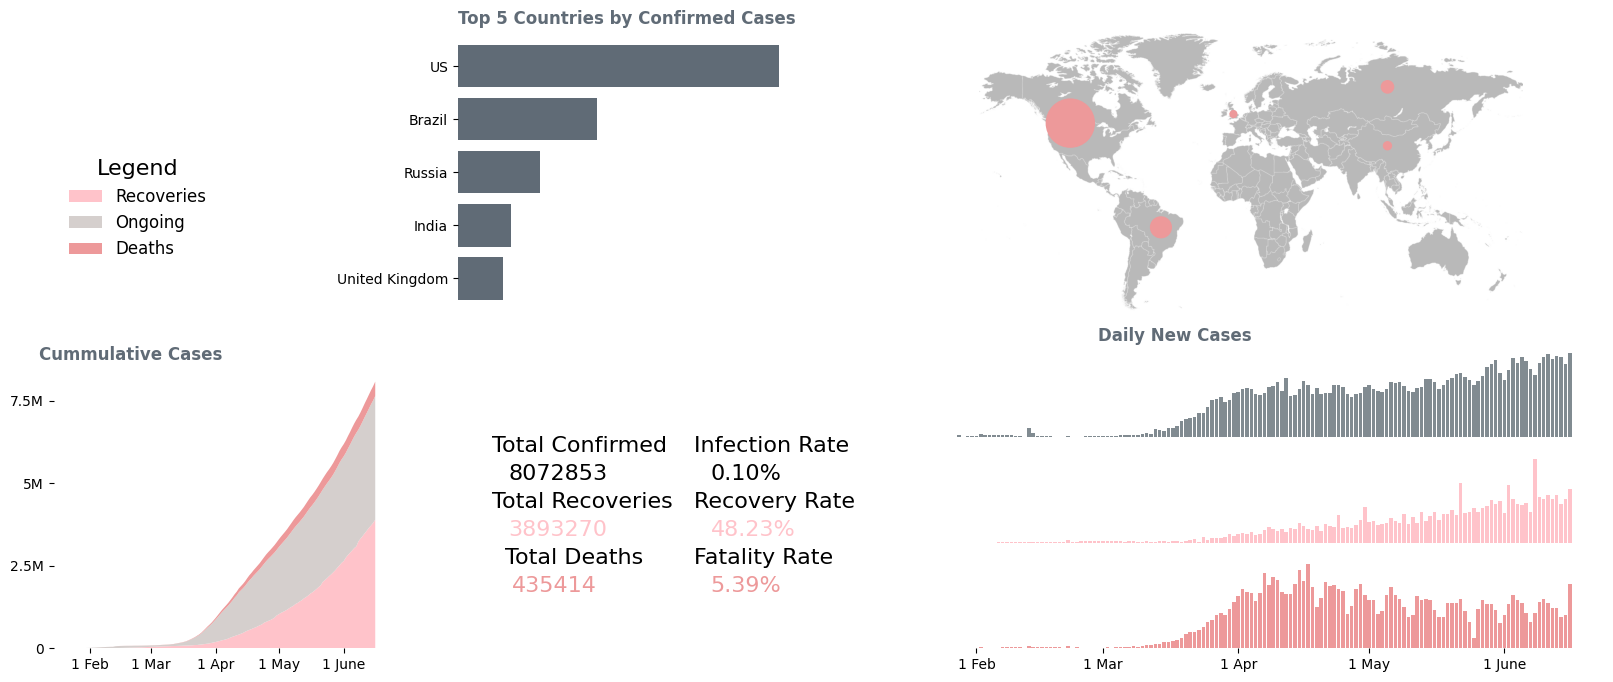

In [60]:
plt.figure(figsize=(20, 8))
ax1 = plt.subplot(2, 4, 5)
plt.stackplot(
    cummulative_cases['date'], 
    cummulative_cases['recoveries'], 
    cummulative_cases['confirmed'] - cummulative_cases['deaths'] - cummulative_cases['recoveries'], 
    cummulative_cases['deaths'],
    labels = ['Recoveries', 'Ongoing', 'Deaths'],
    colors = [color_pallete[0], color_pallete[2], color_pallete[1]])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_title('Cummulative Cases', ha = 'right', color = color_pallete[4], fontweight = 'bold')
ax1.set_xticklabels(['1 Feb', '1 Mar', '1 Apr', '1 May', '1 June'])
ax1.set_yticks([0, 2.5e6, 5e6, 7.5e6])
ax1.set_yticklabels(['0', '2.5M', '5M', '7.5M'])
plt.legend(title = 'Legend', bbox_to_anchor = (0, 1.8), loc = 'upper left', frameon = False, fontsize = 12)
plt.rcParams['legend.title_fontsize'] = 30
ax2 = plt.subplot(2, 4, 2)
ax2.barh(countries.loc[0:4,'Country/Region'], countries.loc[0:4,'confirmed'], color = color_pallete[4])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xticks([])
ax2.invert_yaxis() 
ax2.set_title('Top 5 Countries by Confirmed Cases', ha = 'center', color = color_pallete[4], fontweight = 'bold')
ax3 = plt.subplot(2, 2, 2, frameon = False)
ax3.set_xticks([])
ax3.set_yticks([])
# countries = covid19.where(covid19['date']=='6/16/2020').groupby('Country/Region').sum().sort_values('confirmed', ascending=False).reset_index()
# countries.loc[0:5,'Country/Region']
worldmap = plt.imread('worldmap.png')
ax3.add_patch(plt.Circle((200,200), countries.loc[0, 'confirmed']/total_confirmed*200, color = color_pallete[1]))
ax3.add_patch(plt.Circle((400,430), countries.loc[1, 'confirmed']/total_confirmed*200, color = color_pallete[1]))
ax3.add_patch(plt.Circle((900,120), countries.loc[2, 'confirmed']/total_confirmed*200, color = color_pallete[1]))
ax3.add_patch(plt.Circle((900,250), countries.loc[3, 'confirmed']/total_confirmed*200, color = color_pallete[1]))
ax3.add_patch(plt.Circle((560,180), countries.loc[4, 'confirmed']/total_confirmed*200, color = color_pallete[1]))
ax3.imshow(worldmap)
ax4 = plt.subplot(2, 4, 6)
plt.text(0.1, 0.7,'Total Confirmed', fontsize = 16)
plt.text(0.15, 0.6, total_confirmed, fontsize = 16)
plt.text(0.1, 0.5,'Total Recoveries', fontsize = 16)
plt.text(0.15, 0.4, total_recoveries, color = color_pallete[0], fontsize = 16)
plt.text(0.14, 0.3,'Total Deaths', fontsize = 16)
plt.text(0.16, 0.2, total_deaths, color = color_pallete[1], fontsize = 16)
plt.text(0.7, 0.7,'Infection Rate', fontsize = 16)
plt.text(0.75, 0.6, f'{infection_rate:.2f}%', fontsize = 16)
plt.text(0.7, 0.5,'Recovery Rate', fontsize = 16)
plt.text(0.75, 0.4,  f'{recovery_rate:.2f}%', color = color_pallete[0], fontsize = 16)
plt.text(0.7, 0.3,'Fatality Rate', fontsize = 16)
plt.text(0.75, 0.2,  f'{fatality_rate:.2f}%', color = color_pallete[1], fontsize = 16)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.set_xticks([])
ax4.set_yticks([])
ax5 = plt.subplot(2, 2, 4)

ax51 = plt.subplot(6, 2, 8, frameon = False)
ax51.set_title('Daily New Cases', ha = 'right', color = color_pallete[4], fontweight = 'bold')
ax51.bar(cummulative_cases['date'], cummulative_cases['change_confirmed'], color = color_pallete[3])
ax51.set_xticks([])
ax51.set_yticks([])
ax52 = plt.subplot(6, 2, 10, frameon = False)
ax52.bar(cummulative_cases['date'], cummulative_cases['change_recoveries'], color = color_pallete[0])
ax52.set_xticks([])
ax52.set_yticks([])
ax53 = plt.subplot(6, 2, 12, frameon = False)
ax53.set_yticks([])
ax53.bar(cummulative_cases['date'], cummulative_cases['change_deaths'], color = color_pallete[1])
ax53.set_xticklabels(['1 Feb', '1 Mar', '1 Apr', '1 May', '1 June'])